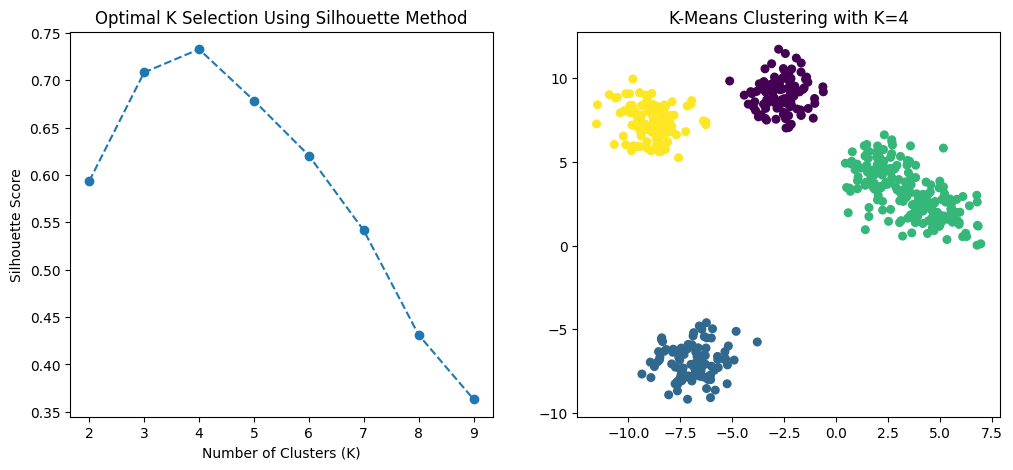

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

# Step 1: Generate Synthetic Data
X, _ = make_blobs(n_samples=500, centers=5, random_state=42)

# Step 2: Determine Optimal K Using Silhouette Scores
k_values = range(2, 10)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

# Step 3: Identify Best K
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]

# Step 4: Apply K-Means with Best K and Visualize Results
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

plt.figure(figsize=(12, 5))

# Plot Silhouette Scores
plt.subplot(1, 2, 1)
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Optimal K Selection Using Silhouette Method")

# Plot Final Clusters
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", s=30)
plt.title(f"K-Means Clustering with K={best_k}")

plt.show()
